# Natural Language Processing with Disaster Tweets


In [1]:
import re
import string
import pandas as pd
import numpy as np
import seaborn as sns
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
nlp = spacy.load('en_core_web_sm')
sns.set_theme()
sns.set(rc = {'figure.figsize':(10,6)})
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
subm = pd.read_csv('sample_submission.csv')

# Data claeaning and Data Visualization 

In [3]:
def remove_usernames_links_punctuation(tweet):
    tweet = re.sub('@[^\s]+','',str(tweet))
    tweet = re.sub('http[^\s]+','',str(tweet))
    return ''.join([x.lower() for x in tweet if x not in string.punctuation])

In [4]:
train['clean_text'] = train.text.apply(remove_usernames_links_punctuation)
test['clean_text'] = test.text.apply(remove_usernames_links_punctuation)

In [5]:
train.clean_text = train.clean_text.apply(lambda item: ' '.join([w.lemma_ for w in nlp(item)]))

In [6]:
def token_count(token):
    return len(nlp(token))


In [7]:
train['token_count'] = train.clean_text.apply(token_count)
test['token_count'] = test.clean_text.apply(token_count)

<Axes: xlabel='token_count', ylabel='count'>

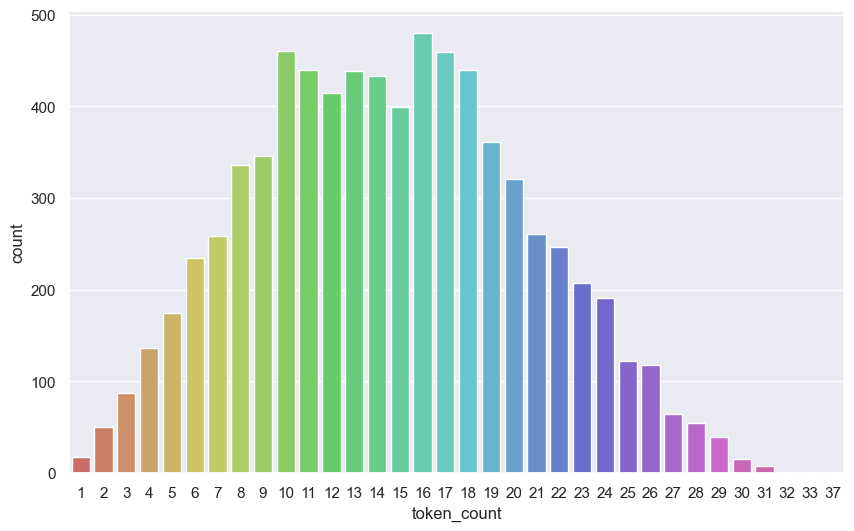

In [8]:
sns.countplot(x='token_count', data=train, palette='hls')

<Axes: xlabel='token_count', ylabel='Density'>

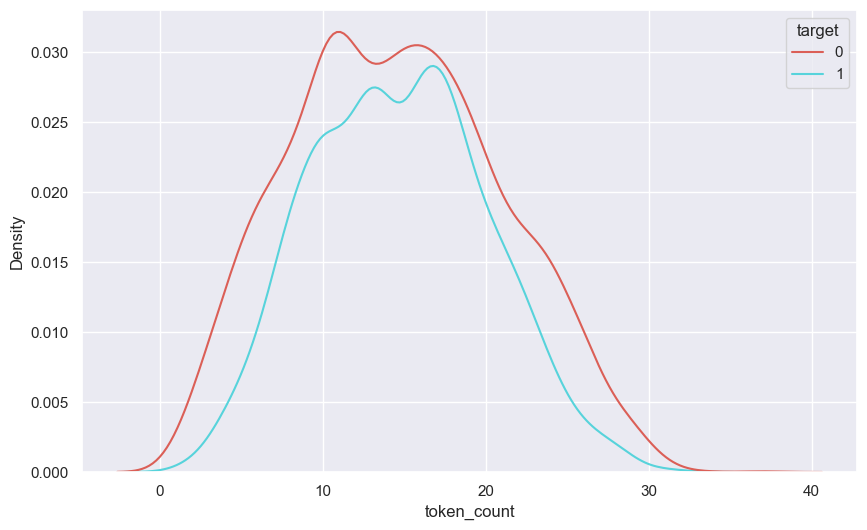

In [9]:
sns.kdeplot(x='token_count', data=train, hue='target', palette='hls')

In [10]:
X_train = train.clean_text.values
X_test = test.clean_text.values
y_train = train.target.values
y_test = subm.target.values

# Model implementation

In [11]:
ppl = Pipeline([('tfidf', TfidfVectorizer(stop_words='english', max_df=0.95)), 
               ('clf', XGBClassifier(n_estimators=500,learning_rate=0.001))]
              )
ppl.fit(X_train, y_train)
y_pred = ppl.predict(X_test)
y_pred_train = ppl.predict(X_train)

# Metrices

In [17]:
print('Accuracy:',accuracy_score(y_test, y_pred)*100,'%')
print('\t')
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

Accuracy: 93.19644498927367 %
	
[[3041  215]
 [   7    0]]


              precision    recall  f1-score   support

           0       1.00      0.93      0.96      3256
           1       0.00      0.00      0.00         7

    accuracy                           0.93      3263
   macro avg       0.50      0.47      0.48      3263
weighted avg       1.00      0.93      0.96      3263



In [18]:
from sklearn.ensemble import VotingClassifier

models=[RandomForestClassifier(), AdaBoostClassifier() ,
        GradientBoostingClassifier(), XGBClassifier(), LGBMClassifier()]

model_names=['RandomForestClassifier', 'AdaBoostClassifier',
             'GradientBoostingClassifier', 'XGBClassifier', 'LGBMClassifier']

ppl = Pipeline([('tfidf', TfidfVectorizer(stop_words='english', max_df=0.95)), 
               ('clf', VotingClassifier(estimators=list(zip(model_names, models))))]
              )
ppl.fit(X_train, y_train)
y_pred = ppl.predict(X_test)
y_pred_train = ppl.predict(X_train)

In [19]:
print(f'Accuracy:{accuracy_score(y_test, y_pred)*100:.3f} %')
print('\n')
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

Accuracy:74.165 %


[[2419  837]
 [   6    1]]


              precision    recall  f1-score   support

           0       1.00      0.74      0.85      3256
           1       0.00      0.14      0.00         7

    accuracy                           0.74      3263
   macro avg       0.50      0.44      0.43      3263
weighted avg       1.00      0.74      0.85      3263



# Thanks Great Job!